In [14]:
# Script Name: Assignment 10
# Purpose of script: Complete Assignment 10 for Econ 320
# Author: Gavin Mason
# Date Created: 11/29/2022
# Notes:

# Packages
import os
import numpy as np
import random
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from scipy.optimize import minimize
import math

In [15]:
birthday = 11212001
np.random.seed(11212001)
b0 = 3
b1 = 2
x = np.random.normal(10, 1, 1000000)
u = np.random.normal(0, 1, 1000000)
ux = u*x
y = b0+b1*x+ux
population = {"x":x,"u":u,"ux":ux,"y":y} 
population = pd.DataFrame(population)
population.describe()

,x,u,ux,y
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,10.000230,0.000821,0.008663,23.009123
std,0.999160,0.999898,10.051006,10.249000
min,5.082944,-4.542586,-49.319748,-23.004277
25%,9.326008,-0.673360,-6.680208,16.068052
50%,10.000264,0.000523,0.005135,22.800967
75%,10.674504,0.676155,6.705987,29.746383
max,14.497065,4.669908,48.747566,77.435061


In [16]:
x_mean = population['x'].mean()
y_mean = population['y'].mean()
uxvar = np.var(ux)
SST = ((population['y'] - y_mean)**2).sum()

varb1e = np.sum((population['x'] - x_mean)**2*uxvar)/(SST**2)
print("Expected Variance of ux =", uxvar)
print("Expected Variance of Beta 1 Hat =", varb1e)


Expected Variance of ux = 101.02262662073697
Expected Variance of Beta 1 Hat = 9.14034825362395e-09


In [17]:
beta1hat = []
for i in range(1000):
    sample = population.sample(1000,replace=False)
    reg = smf.ols(formula = 'y~x', data = sample).fit()
    beta1 = reg.params[1]
    beta1hat.append(beta1)

varb1hat = np.var(beta1hat) 
print("Empirical Variance of Beta 1 Hat =", varb1hat)

Empirical Variance of Beta 1 Hat = 0.10900065313084764


In [18]:
(Z==3)*1

array([0, 0, 0, ..., 0, 0, 0])

Actual Sample Beta 1's variance is higher than the population expectation, but this is usual for a sample. Principle = Total sample variation automatically increases with the sample size.

In [54]:
u = np.random.normal(0,1,1000000)
b1, b2, b3, b4, b5 = 1, 1, 2, 1, 2

# define cut points for the rank:
cutpts = [0, 1, 2, 3, 4, 5]

# create categorical variable containing ranges for the rank:
u = np.random.normal(0,np.sqrt(1),1000000)
Z = np.random.randint(1,6, 1000000)
X1 = (Z==1)*1
X2 = (Z==2)*1
X3 = (Z==3)*1
X4 = (Z==4)*1
X5 = (Z==5)*1
b1, b2, b3, b4, b5 = 1, 1, 0, 1, 2
y = 2.5 + b1*dummies['X1'] + b2*dummies['X2'] + b3*dummies['X3'] + b4*dummies['X4'] + b5*dummies['X5'] + u
dummies = pd.DataFrame({'y':y, 'Z':Z, 'X1':X1, 'X2':X2, 'X3':X3, 'X4':X4, 'X5':X5})

,y,Z,X1,X2,X3,X4,X5
0,3.902908,5,0,0,0,0,1
1,3.879865,4,0,0,0,1,0
2,2.532877,1,1,0,0,0,0
3,4.345212,3,0,0,1,0,0
4,1.103266,4,0,0,0,1,0


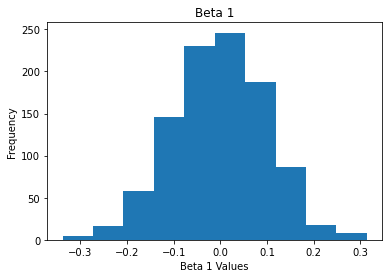

In [67]:
beta1hat = []
for i in range(1000):
    sample = dummies.sample(1000,replace=False)
    reg = smf.ols(formula = 'y~X1 + X2:X3 + X4 + X5', data = sample).fit()
    beta1 = reg.params[1]
    beta1hat.append(beta1)

plt.hist(beta1hat)
plt.title('Beta 1') 
plt.ylabel('Frequency') 
plt.xlabel('Beta 1 Values')  
plt.show()

In [68]:
print(np.median(beta1hat))
#Shows that when X3 is held constant, X1 has a median intercept shifter of -0.0028034980864477393.

-0.0028034980864477393
